In [1]:
import string
from collections import Counter
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize

In [2]:
def get_tweets():
    import GetOldTweets3 as got   # library used to scrape data from twitter without any other tools
    tweetCriteria = got.manager.TweetCriteria().setQuerySearch('#coronavirus') \
        .setSince("2020-01-01") \
        .setUntil("2020-01-30") \
        .setMaxTweets(100)
    # Creation of list that contains all tweets
    tweets = got.manager.TweetManager.getTweets(tweetCriteria)
    # Creating list of chosen tweet data
    text_tweets = [[tweet.text] for tweet in tweets]
    return text_tweets

In [3]:
#import nltk
#nltk.download()
# reading text file
text = ""
text_tweets = get_tweets()
length = len(text_tweets)




In [4]:
text_tweets

[['Señores para qué #coronavirus en Colombia, si aún no hemos podido derrotar el virus llamado uribismo. '],
 [' Resmi açıklamaya göre ölü sayısı 170, vaka sayısı 7711. Vaka sayısı ve ölü sayısı parabolik olarak artıyor. #coronavirus'],
 ['Grants for epilepsy and multiple sclerosis research, what you need to know about #coronavirus and Australia Day honours – this week at @Alfred_Research http://bit.ly/38U4nVj'],
 ['I wonder when everyone will be concerned about the #coronavirus. ___ #PoetsAndRhymers'],
 ['#Update: The number of confirmed cases of novel #coronavirus rose to 7,711 in Chinese mainland as of Jan 29, including 170 deaths '],
 ['Joining many international airlines, @AirCanada suspends all flights to Beijing and Shanghai, with last flights out on January 30th. Safe travels, everyone. #coronavirus '],
 ['Se realiza estudio del genoma ARN del virus que es donde #coronavirus,muto y se aplica descarte del resto de virus conocidos, asumo que el de Guayaquil se logró cultivar en u

In [5]:
for i in range(0, length):
    text = text_tweets[i][0] + " " + text

# converting to lowercase
lower_case = text.lower()
cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))


In [6]:
import nltk
nltk.download('punkt')


[nltk_data] Downloading package punkt to C:\Users\Fahad
[nltk_data]     Ehtesham\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [7]:
tokenized_words = word_tokenize(cleaned_text)

In [8]:
tokenized_words

['nstworld',
 'britain',
 'working',
 'on',
 'flight',
 'home',
 'for',
 'citizens',
 'in',
 'coronavirushit',
 'wuhan',
 'bitmesine',
 '2',
 'gün',
 'kalaocak',
 'ayının',
 'özeti',
 'güzel',
 'güzel',
 'gel',
 'e',
 'mi',
 'tatlı',
 'şubatsen',
 'üzme',
 'bari',
 'earthquakes',
 'fires',
 'accidents',
 'coronavirus',
 'enough',
 'welcomingfebruary',
 'hope',
 'chinese',
 'natl',
 'arrested',
 'smuggling',
 'us',
 'bioresearch',
 'vials',
 'into',
 'china',
 'trumps',
 'peace',
 'deal',
 'rejected',
 'httpsyoutube5d21t5ft6r0',
 'coronavirus',
 'biowarfare',
 'china',
 'harvard',
 'lieofthecentury',
 'dealofthecentury',
 'iran',
 'syria',
 'yemen',
 'cdc',
 'who',
 'usforeignpolicy',
 'thedailywrapup',
 'internacional',
 'asciende',
 'a',
 '169',
 'la',
 'cifra',
 'de',
 'personas',
 'fallecidas',
 'por',
 'coronavirus',
 'en',
 'china',
 'giovanniceliss',
 'urgente',
 'actualizacion',
 'coronavirus',
 'el',
 'numero',
 'de',
 'infectados',
 'sube',
 'a',
 '7186',
 'personas',
 'por',


In [9]:
# import stopwords
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
# Removing stop words from the tokenized words list
final_words = [word for word in tokenized_words if word not in stop_words]

In [10]:
# Get emotions text
emotion_list = []
with open('emotions.txt', 'r') as file:
    for line in file:
        clear_line = line.replace('\n', '').replace(',', '').replace("'", '').strip()
        word, emotion = clear_line.split(':')
        if word in final_words:
            emotion_list.append(emotion)

w = Counter(emotion_list)
print(w)



Counter({' fearful': 3, ' attracted': 2, ' surprise': 2, ' sad': 2, ' alone': 2, ' entitled': 2, ' average': 1, ' happy': 1, ' free': 1, ' esteemed': 1, ' anxious': 1, ' hated': 1})


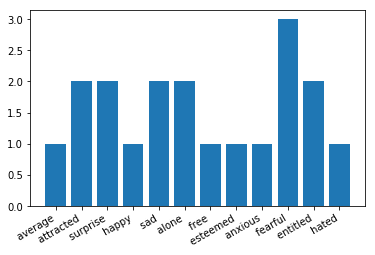

In [11]:
fig, ax1 = plt.subplots()
ax1.bar(w.keys(), w.values())
fig.autofmt_xdate()
plt.savefig('graph.png')
plt.show()